<a href="https://colab.research.google.com/github/PARTSI14/IFOREST-AND-ECOD/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod scikit-learn pandas matplotlib seaborn


In [28]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
from pyod.models.ecod import ECOD


In [29]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [30]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [31]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#χρήση αλγορίθμου Isolation Forest
iforest = IForest(contamination=0.02, random_state=42)
iforest.fit(X_scaled)
y_iforest = iforest.labels_  # 0 = normal, 1 = anomaly
ecod = ECOD(contamination=0.02)
ecod.fit(X_scaled)
y_ecod = ecod.labels_


In [33]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [34]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

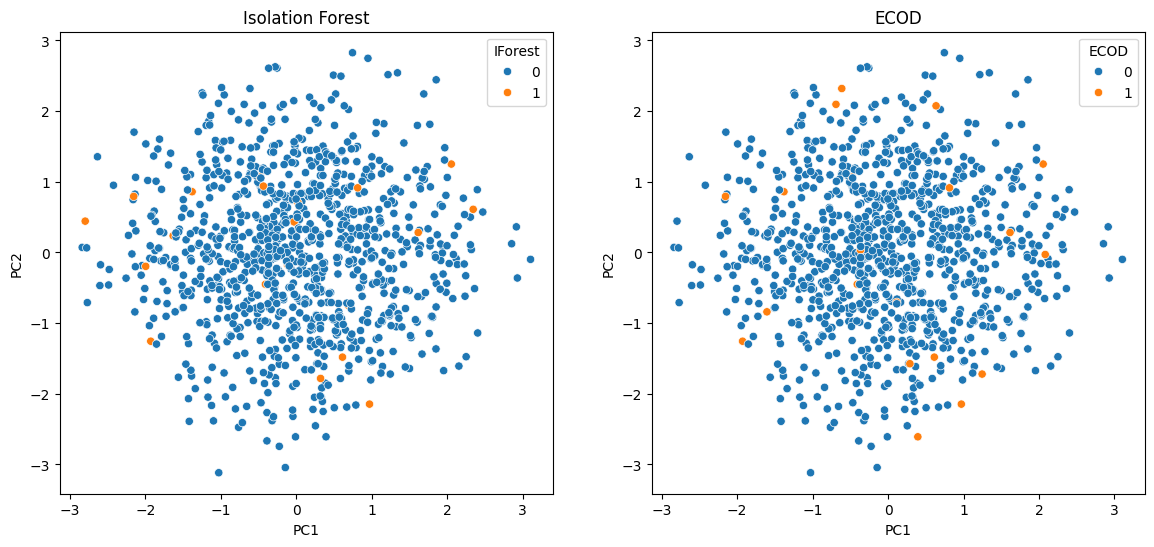

In [38]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA dataframe για plotting
df_vis = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_vis['IForest'] = y_iforest
df_vis['ECOD'] = y_ecod

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="IForest", ax=axs[0]).set_title("Isolation Forest")
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="ECOD", ax=axs[1]).set_title("ECOD")
plt.show()



In [40]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
print("Isolation Forest: Ανωμαλίες =", sum(y_iforest))
print("ECOD: Ανωμαλίες =", sum(y_ecod))

Isolation Forest: Ανωμαλίες = 20
ECOD: Ανωμαλίες = 20
